## Goal:

Verify the stability of the results.

Verify if new code is correct.

Create and annotate a reference dataset.

## Agenda:

* **A)** Stability of results over long time intervals(days).
* **B)** Stability of results over short time intervals(hour).
* **C)** What are the differences between the parallel and sequential implementations?
* **D)** New reference dataset.
* **E)** Hypothesis.

## Experiment Results Comparison

This notebook presents the results of comparing evaluations across different experimental setups. The experiments are categorized by:

* **Model:** gemini-flash.001, gemini-flash.002, gpt4o-mini
* **Prompt:**
    * **same:** Natural Language Inference (NLI) and answer refusal tasks are presented in the same prompt.
    * **separated:** NLI and answer refusal tasks are presented in separate prompts.
* **Concurrency:**
    * **no concur:** The old algorithm without concurrency.
    * **concur %d:** The number of threads used for the following tasks:
        1. Remove pronouns
        2. Calculate NLI
        3. Calculate answer refusal

**Experiment Naming Convention:**

The experiment names follow the format:

* **concur_algo_%d_%d:** Prompt: separated; Concurrency: concur 32; Date of experiment: %d_%d
* **concur_algo_%d_%d(2):** Prompt: separated; Concurrency: concur 32; Date of experiment: %d_%d, 1 hour later than concur_algo_%d_%d experiment
* **no_concur_algo_%d_%d:** Prompt: separated; Concurrency: no concur; Date of experiment: %d_%d

**Heatmap Interpretation:**

Each cell on the heatmap represents the comparison between two experiments. The comparison is based on the following criteria:

* **Hypothesis Comparison:** Hypotheses from different evaluations are compared in pairs.
* **Epsilon Threshold (eps):** If the difference between the hypotheses in different evaluations is less than or equal to 0.2 (eps), the hypotheses are considered to be labeled the same.

# A) 

## Stability of results over long time intervals(days).

# gemini-flash001

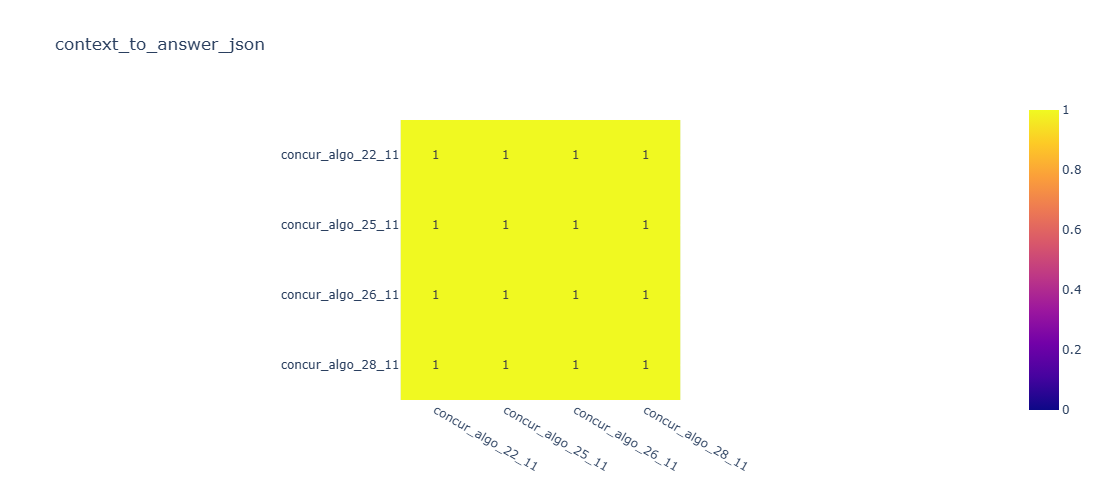

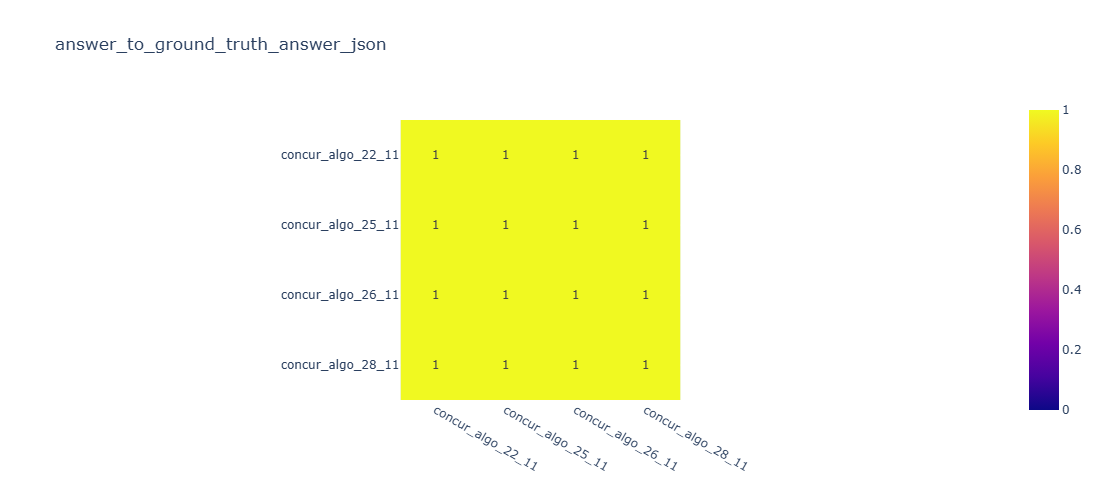

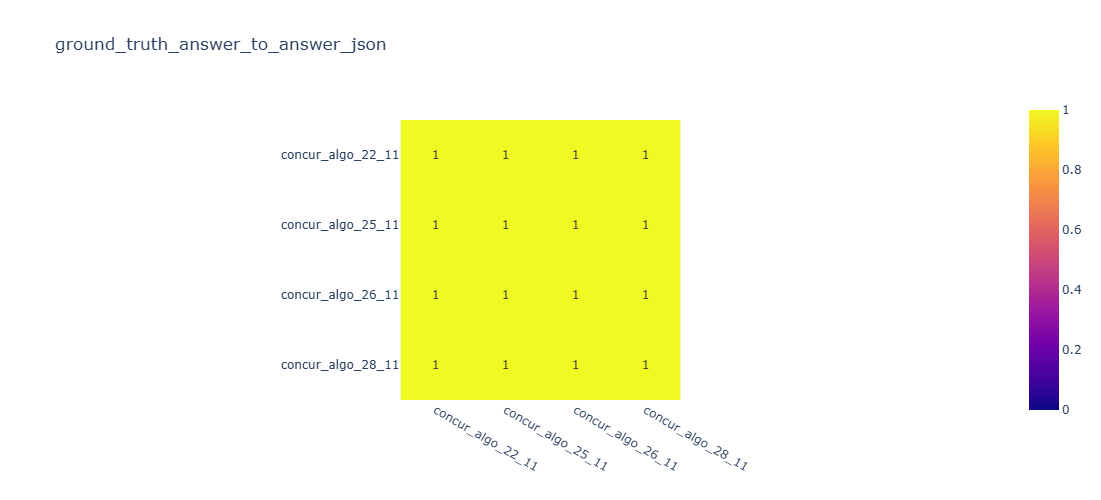

In [339]:
idxes = [1, 2, 5, 7]
get_heatmaps([loaded_files_flash1[i] for i in idxes], [experiment_names_flash1[i] for i in idxes])

# gemini-flash002

In [358]:
print("Given a ground truth and an answer statements, analyze each statement and classify them in one of the following categories: TP (true positive): statements that are present in answer that are also directly supported by the one or more statements in ground truth, FP (false positive): statements present in the answer but not directly supported by any statement in ground truth, FN (false negative): statements found in the ground truth but not present in answer. Each statement can only belong to one of the categories. Provide a reason for each classification.")


Given a ground truth and an answer statements, analyze each statement and classify them in one of the following categories: TP (true positive): statements that are present in answer that are also directly supported by the one or more statements in ground truth, FP (false positive): statements present in the answer but not directly supported by any statement in ground truth, FN (false negative): statements found in the ground truth but not present in answer. Each statement can only belong to one of the categories. Provide a reason for each classification.


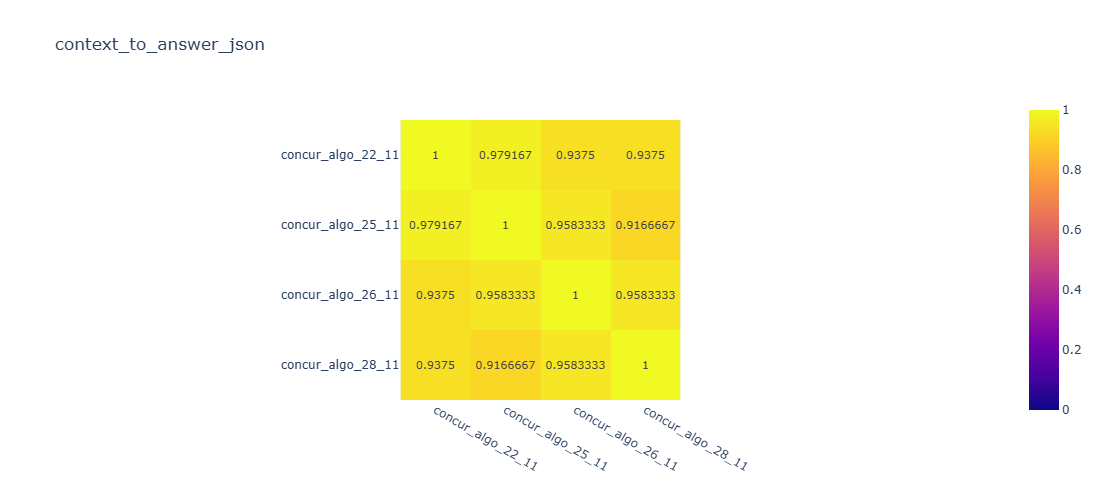

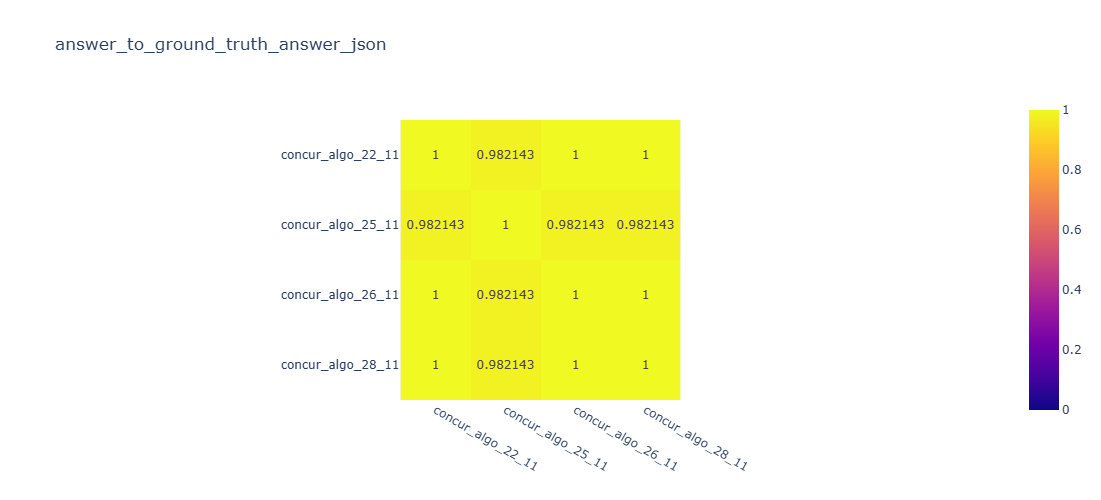

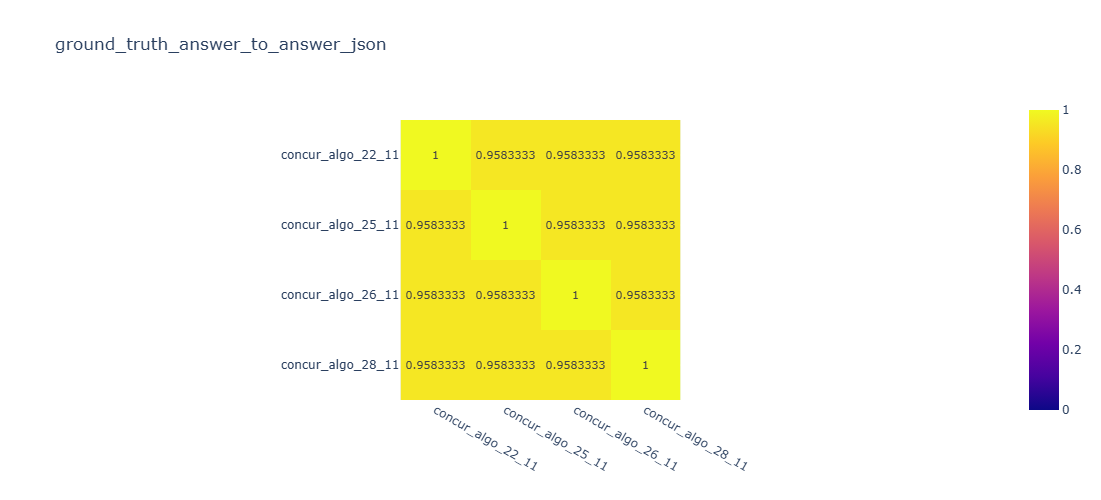

In [340]:
idxes = [0, 1, 4, 6]
get_heatmaps([loaded_files_flash2[i] for i in idxes], [experiment_names[i] for i in idxes])

# gpt4o-mini

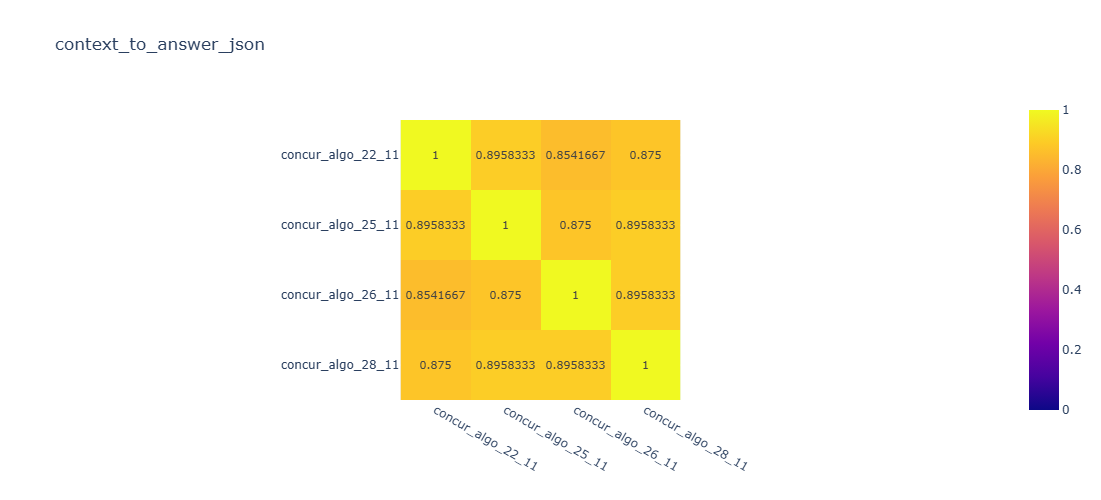

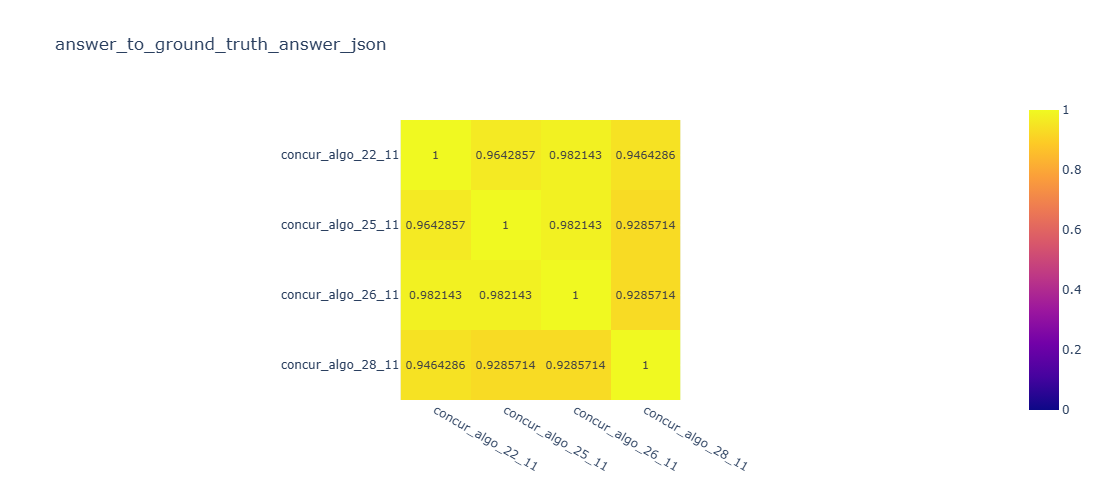

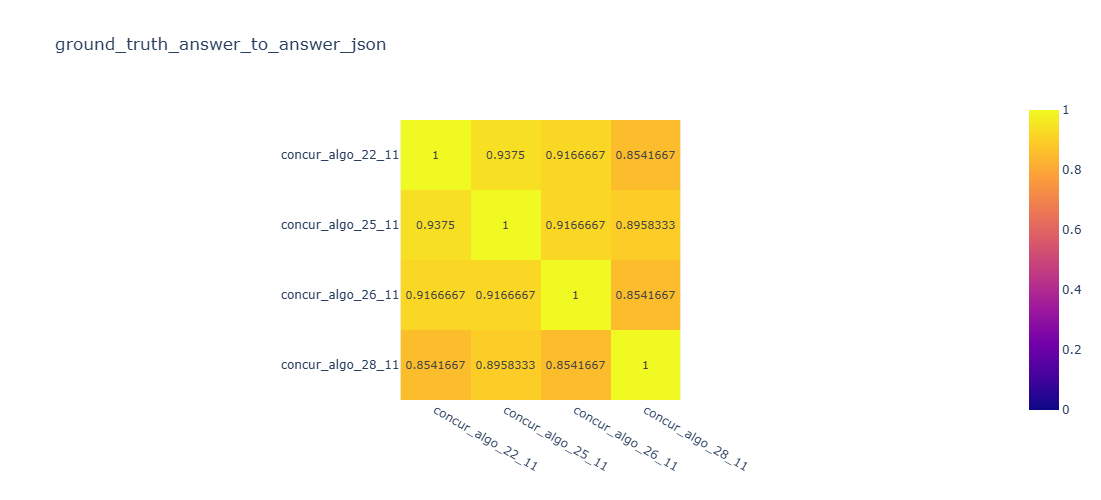

In [341]:
idxes = [0, 1, 4, 6]
get_heatmaps([loaded_files_gpt4omini[i] for i in idxes], [experiment_names[i] for i in idxes])

# B)

# Stability of results over short time intervals(hour).

# gemini-flash001

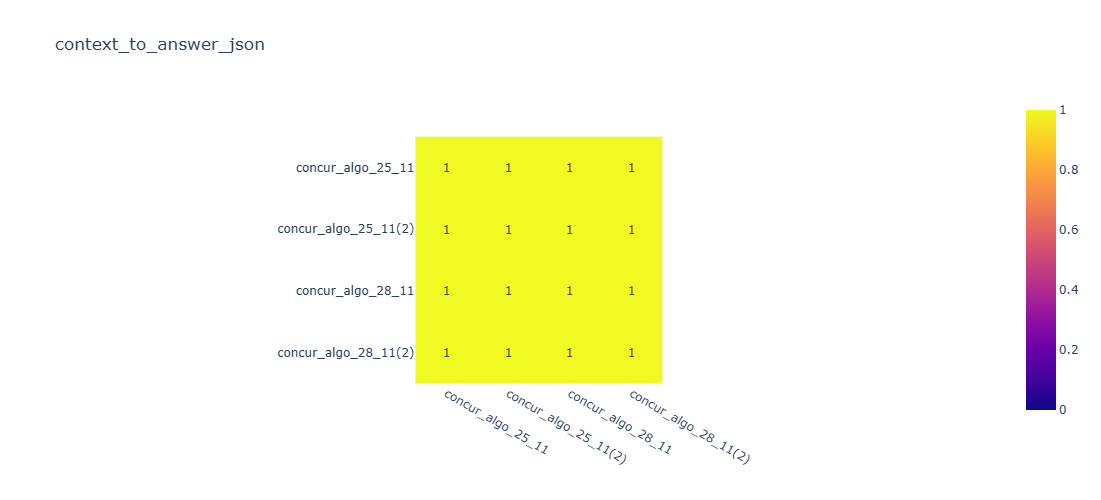

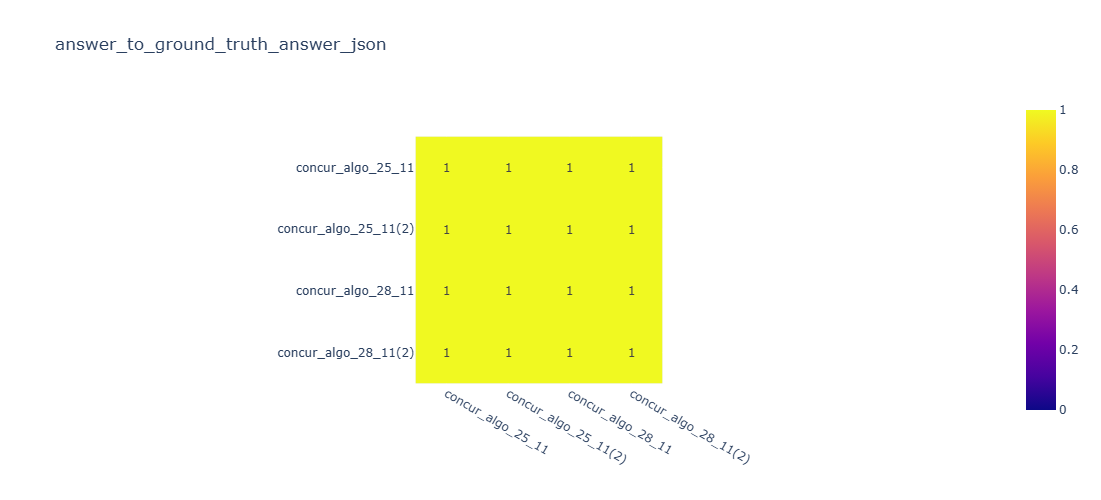

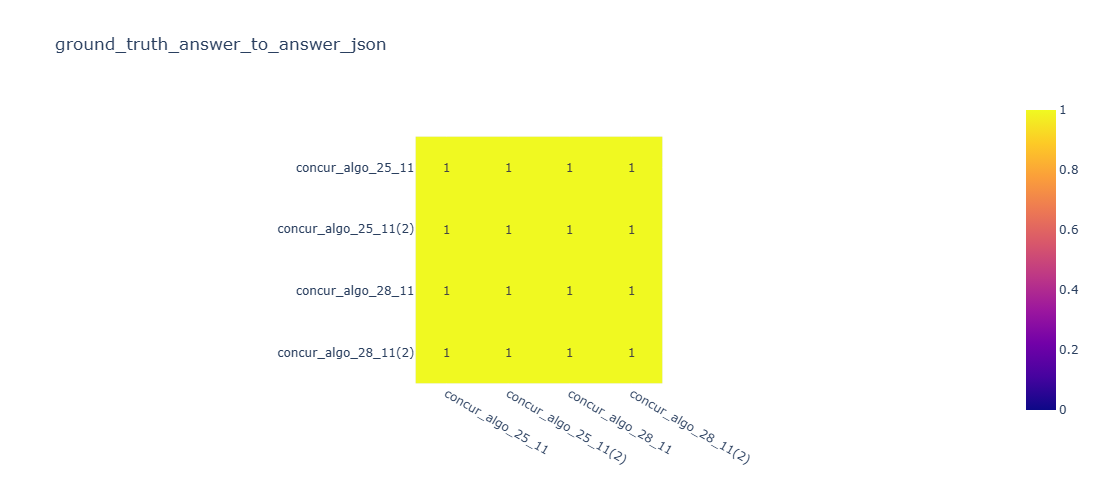

In [342]:
idxes = [2, 3, 7, 8]
get_heatmaps([loaded_files_flash1[i] for i in idxes], [experiment_names_flash1[i] for i in idxes])

# gemini-flash002

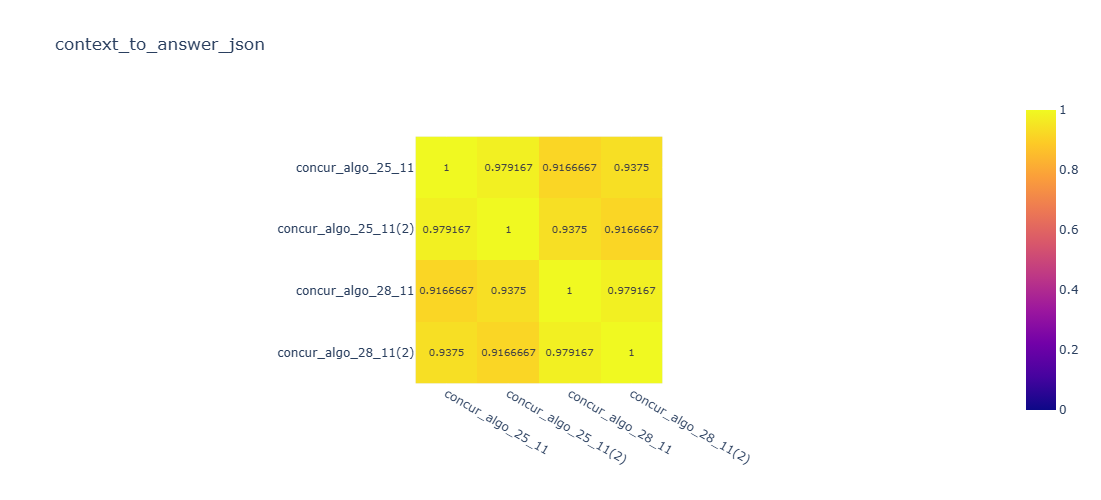

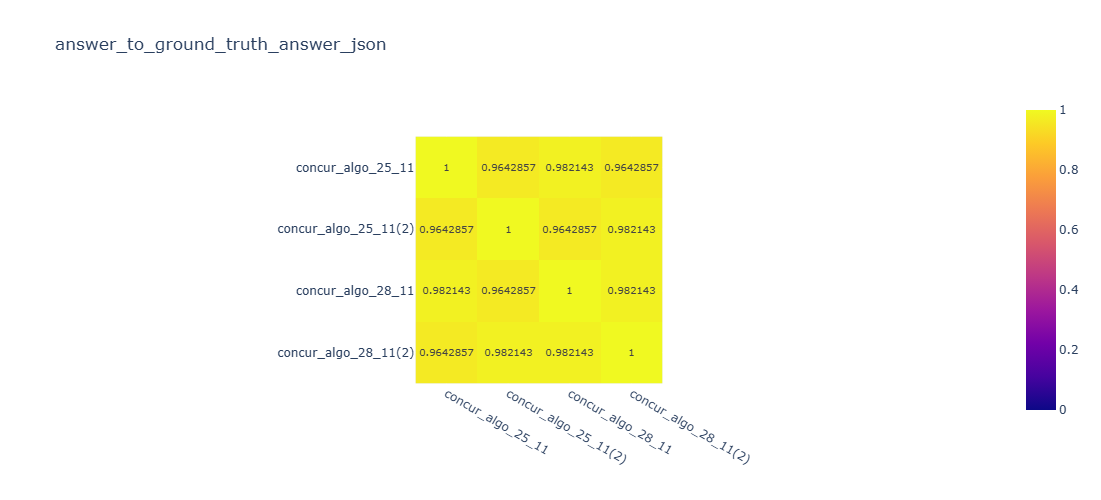

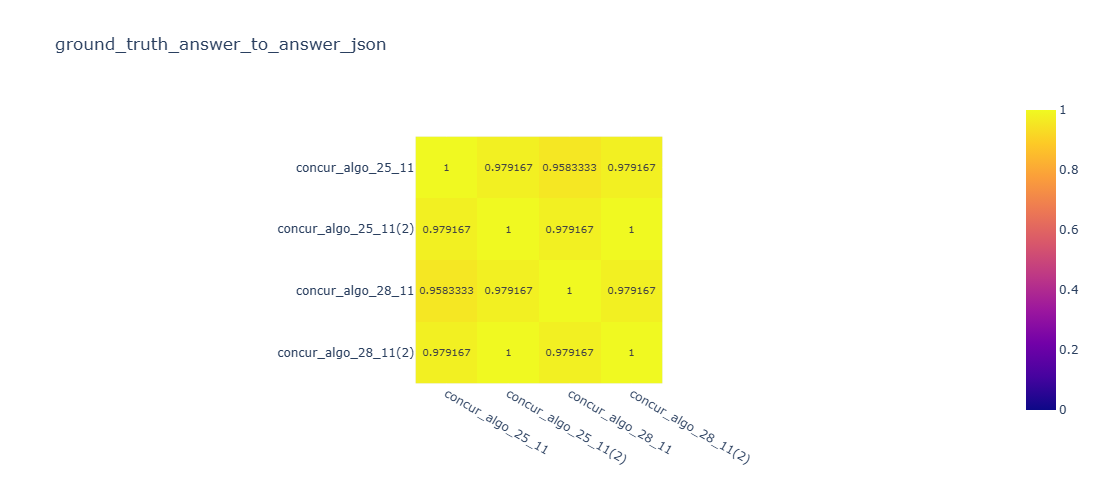

In [343]:
idxes = [1, 2, 6, 7]
get_heatmaps([loaded_files_flash2[i] for i in idxes], [experiment_names[i] for i in idxes])

# gpt4o-mini

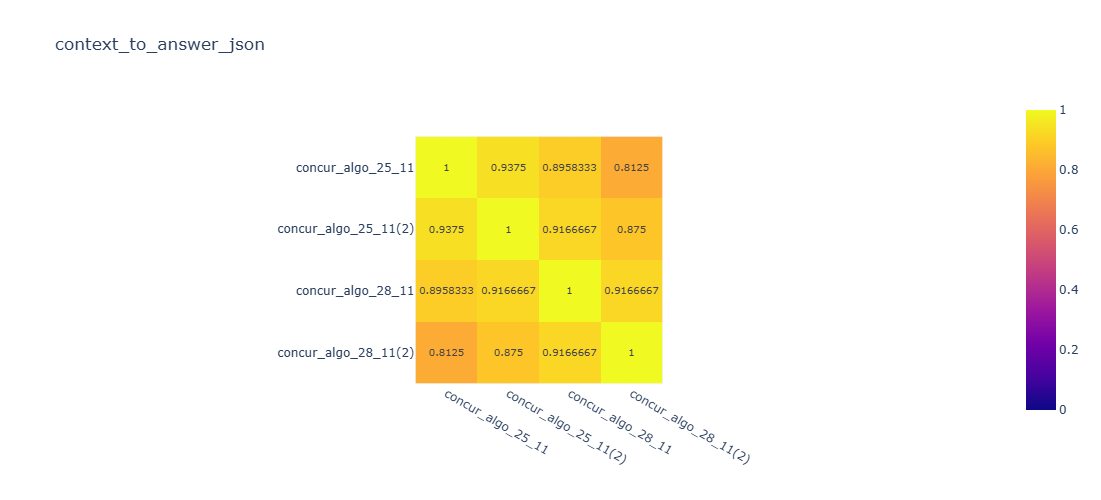

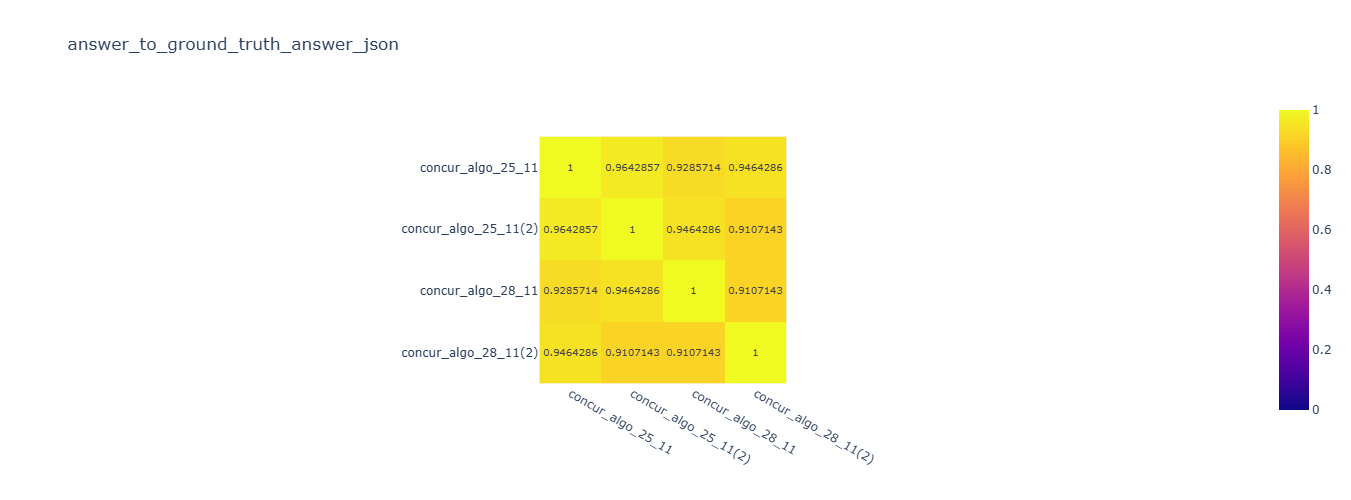

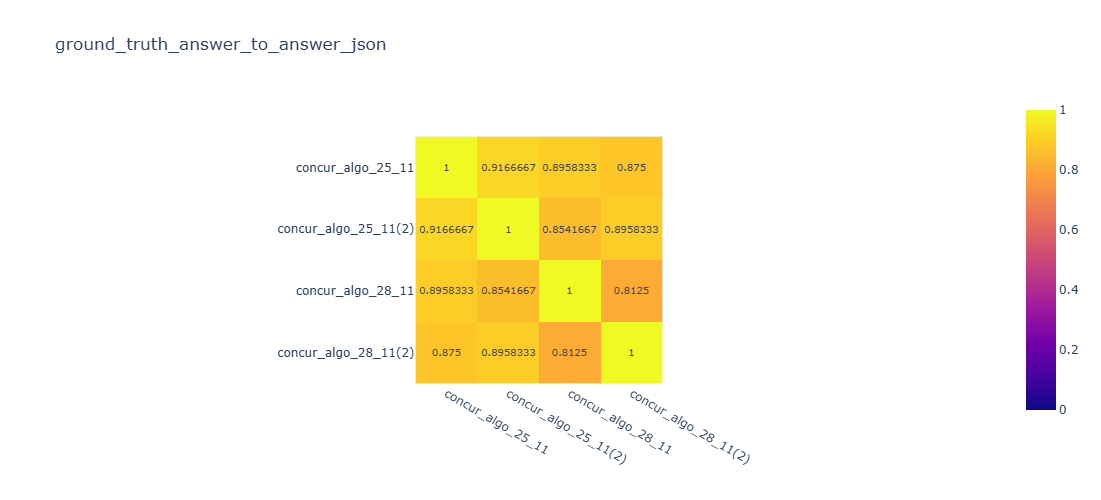

In [344]:
idxes = [1, 2, 6, 7]
get_heatmaps([loaded_files_gpt4omini[i] for i in idxes], [experiment_names[i] for i in idxes])

# C)

## What are the differences between the parallel and sequential implementations?

# gemini-flash.001

In [345]:
idxes = [0, 4, 6, 9, 1, 2, 3, 5, 7, 8]
get_heatmaps([loaded_files_flash1[i] for i in idxes], [experiment_names_flash1[i] for i in idxes])

# gemini-flash.002

In [346]:
idxes = [3, 5, 8, 0, 1, 2, 4, 6, 7]
get_heatmaps([loaded_files_flash2[i] for i in idxes], [experiment_names[i] for i in idxes])

# gpt4o-mini

In [347]:
idxes = [3, 5, 8, 0, 1, 2, 4, 6, 7]
get_heatmaps([loaded_files_gpt4omini[i] for i in idxes], [experiment_names[i] for i in idxes])

# D)

|               | LLM Model     | Prompt     | Concurrency | Context to answer ROC AUC | Answer to ground truth answer ROC AUC   |  Ground truth answer to answer ROC AUC |
|---------------|---------------|------------|-------------|---------------------------|-----------------------------------------|----------------------------------------|
|               | gemini-flash1 | separated  | concur 32   | 0.7926136363636364        | 0.9157754010695188                    | 0.9142011834319527                      |
|               | gemini-flash2 | separated  | concur 32   | 0.7926136363636364        | 0.9157754010695188                      | 0.9142011834319527                     |
|               | gpt4o-mini    | separated  | concur 32   |  0.7457386363636364        | 0.7453208556149733                      | 0.9151873767258384                     |

# E)

## Comparison: Prompt Stability

**Problem:** A single whitespace in the premise changed the results in 1-2 hypotheses for each metric.

**Hypothesis:** The premise is located at the end of the prompt. Perhaps all input parameters should be clearly framed to prevent the whitespace from affecting the result?

**Experiment:**

* Model: gemini-flash1
* Prompt: Separated
* Concurrency: 32

For each input parameter (document name, hypothesis, premise), framing was added (beginning and end marked with `<<start parameter>>` and `<<end parameter>>`).

Results were then compared with the original premises and premises with a whitespace added.

**Results:**

* **Context to Answer (same / all):** 47 / 48
* **Answer to Ground Truth Answer (same / all):** 51 / 56
* **Ground Truth Answer to Answer (same / all):** 47 / 48 

# Conclusion:

The results of gemini-flash002 and gpt-4o-mini are not stable over long time. The results of gpt-4o-mini are not stable on a short period. The most stable one so far is gemini-flash001.

The results may change in some questions due to minor details.

We need to understand the area of application, if any.